# Obtenemos los datos

In [176]:
!wget 'https://raw.githubusercontent.com/mmonreal/Proyecto-Redes/master/120.txt'

--2020-06-11 05:54:21--  https://raw.githubusercontent.com/mmonreal/Proyecto-Redes/master/120.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 942 [text/plain]
Saving to: ‘120.txt’

120.txt             100%[===================>]     942  --.-KB/s    in 0s      

2020-06-11 05:54:22 (44.6 MB/s) - ‘120.txt’ saved [942/942]



In [0]:
#leemos el archivo
f = open("120.txt","r")
cat = f.readlines()
f.close()

In [6]:
#creamos un directorio donde guardaremos los datos
!mkdir datos

mkdir: cannot create directory ‘datos’: File exists


In [0]:
#descargamos los datos
cat = [i.replace('\n','').replace(' ','_') for i in cat]

import urllib.request
def descargar():
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for i in cat:
    url = i.replace('_', '%20')
    direccion = base+url+'.npy'
    print(direccion)
    urllib.request.urlretrieve(direccion, 'datos/'+i+'.npy')

In [8]:
descargar()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/alarm%20clock.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/hot%20dog.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/tennis%20racquet.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/door.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/broom.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/helmet.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/mushroom.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bicycle.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/triangle.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/scissors.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/mountain.npy
https://storage.googleapis.com/quickdra

# Procesamos los datos

In [0]:
import os
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

def crear_datos():
    #Recorremos todos los archivos que estan dentro de la carpeta datos
    _,_,x = next(os.walk('./datos'))
    #Agregamos a la ruta la carpeta donde estab guardados
    archivos = list(map('datos/'.__add__,x))

    #Asignamos dimensiones a nuestros arreglos
    #imagenes
    x = np.empty([0, 784])
    #etiquetas
    y = np.empty([0])

    #nombres de las imagenes
    categoria = []

    #creamos un arreglo con la informacion de las imagenes,
    # junto con una etiqueta que nos dice que es esa imagen
    for ids, archivo in enumerate(archivos):
        #Cargamos el arreglo con las imagenes
        datos = np.load(archivo)
        #cargamos 4000 elementos de cada imagen
        datos = datos[0: 4000]
        
        #Hacemos one hot encoding para cada una de las imagenes
        #asignando un numero para su salida
        etiquetas = np.full(datos.shape[0], ids)

        x = np.concatenate((x, datos), axis=0)
        y = np.append(y, etiquetas)
    
        #nos quedamos solo con el nombre de la categoria
        categoria.append(archivo.split('.npy')[0].split('datos/')[1])

    #revolvemos nuestros datos
    shufle = np.random.permutation(y.shape[0])
    x = x[shufle, :]
    y = y[shufle]

    #Dividimos datos de entrenamiento y de test
    #para test nos tomamos el 20%

    porcentaje = int(y.shape[0]*.2)

    x_ts = x[0:porcentaje]
    y_ts = y[0:porcentaje]

    x_tr = x[porcentaje:]
    y_tr = y[porcentaje:]

    return x_tr, y_tr, x_ts, y_ts, categoria

#creamos los datos
x_tr, y_tr, x_ts, y_ts, categoria = crear_datos()

Mostramos los datos

skateboard


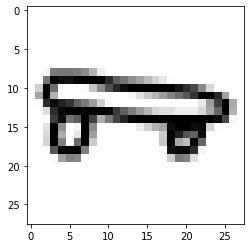

In [28]:
import matplotlib.pyplot as plt
from random import randint

numero = randint(0, len(x_tr))
plt.imshow(x_tr[numero].reshape(28,28),cmap='binary')
print(categoria[int(y_tr[numero])])

In [0]:

x_tr = x_tr.reshape(x_tr.shape[0], 28, 28, 1).astype('float32')
x_ts = x_ts.reshape(x_ts.shape[0], 28, 28, 1).astype('float32')

x_tr /= 255.0
x_ts /= 255.0


y_tr = keras.utils.to_categorical(y_tr, len(categoria))
y_ts = keras.utils.to_categorical(y_ts, len(categoria))

# Modelo

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.utils  import to_categorical
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

#creamos nuestro modelo
modelo = tf.keras.models.Sequential([
  tf.keras.layers.Convolution2D(16, (3, 3),padding='same',input_shape=x_tr.shape[1:], activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),                               
  tf.keras.layers.Convolution2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Convolution2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  #aplanamos los datos del modelo hasta este punto
  tf.keras.layers.Flatten(),   
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(120, activation='softmax')
])


modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [31]:
#Compilamos nuestro modelo
modelo.compile(optimizer='adam',
               loss='categorical_crossentropy',         
               metrics=['top_k_categorical_accuracy'])

#Entrenamos el modelo
H = modelo.fit(x = x_tr, y = y_tr, validation_split=0.1, batch_size = 256, verbose=1, epochs=7)

Epoch 1/7
1350/1350 [==============================] - 185s 137ms/step - loss: 2.3559 - top_k_categorical_accuracy: 0.7030 - val_loss: 1.5826 - val_top_k_categorical_accuracy: 0.8484
Epoch 2/7
1350/1350 [==============================] - 185s 137ms/step - loss: 1.6315 - top_k_categorical_accuracy: 0.8420 - val_loss: 1.3720 - val_top_k_categorical_accuracy: 0.8765
Epoch 3/7
1350/1350 [==============================] - 184s 136ms/step - loss: 1.4727 - top_k_categorical_accuracy: 0.8640 - val_loss: 1.2899 - val_top_k_categorical_accuracy: 0.8864
Epoch 4/7
1350/1350 [==============================] - 185s 137ms/step - loss: 1.3853 - top_k_categorical_accuracy: 0.8751 - val_loss: 1.2186 - val_top_k_categorical_accuracy: 0.8953
Epoch 5/7
1350/1350 [==============================] - 184s 136ms/step - loss: 1.3232 - top_k_categorical_accuracy: 0.8822 - val_loss: 1.1868 - val_top_k_categorical_accuracy: 0.8976
Epoch 6/7
1350/1350 [==============================] - 184s 136ms/step - loss: 1.2781

# Resultados

Capas de convolucion

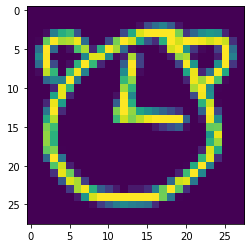

In [96]:
from tensorflow.keras import models

layer_out = [layer.output for layer in modelo.layers[:6]] #Tamos las primeras 6 capas
act_model = models.Model(inputs=modelo.input, outputs=layer_out)

img = x_ts[85849]
plt.imshow(img.squeeze())
activations = act_model.predict(np.expand_dims(img, axis=0)) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


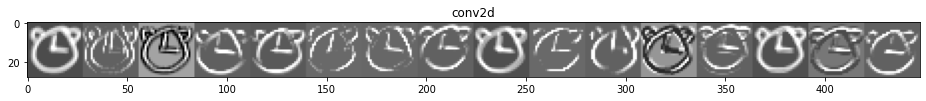

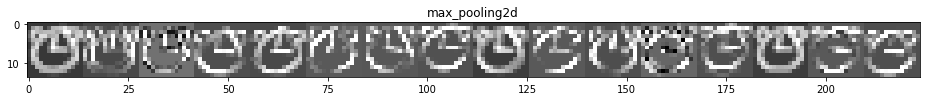

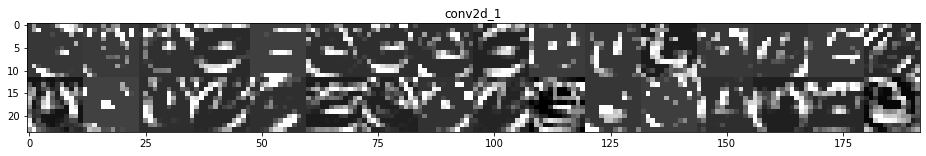

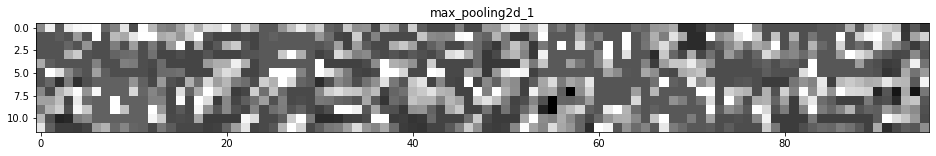

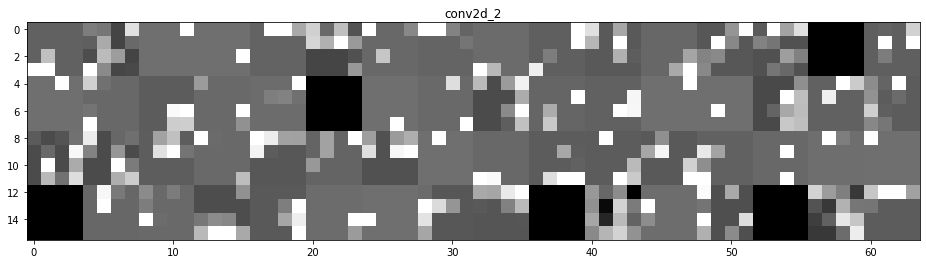

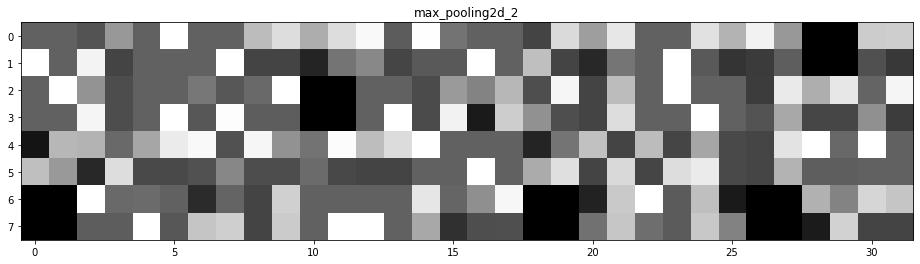

In [98]:
nombre_layer = []
for layer in modelo.layers[:6]:
    nombre_layer.append(layer.name)
    
numero_de_imagenes = 16

for nombre, activacion in zip(nombre_layer, activations):
    n_features = activacion.shape[-1] 
    tamano = activacion.shape[1] 
    n_cols = n_features // numero_de_imagenes 
    grafica = np.zeros((tamano * n_cols, numero_de_imagenes * tamano))
    
    for col in range(n_cols): 
        for row in range(numero_de_imagenes):
            imagen = activacion[0,:, :,col * numero_de_imagenes + row]
            #mejoramos la imagen
            imagen -= imagen.mean()
            imagen /= imagen.std()
            imagen *= 64
            imagen += 128
            imagen = np.clip(imagen, 0, 255).astype('uint8')
            grafica[col * tamano : (col + 1) * tamano,row * tamano : (row + 1) * tamano] = imagen

    scale = 1. / tamano
    plt.figure(figsize=(scale * grafica.shape[1],scale * grafica.shape[0]))
    plt.title(nombre)
    plt.grid(False)
    plt.imshow(grafica, aspect='auto', cmap='gray')

Graficas de rendimiento

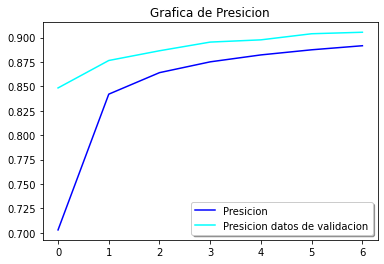

In [99]:
from matplotlib import pyplot as plt

plt.title('Grafica de Presicion')
plt.plot(H.history['top_k_categorical_accuracy'],color='b',label='Presicion')
plt.plot(H.history['val_top_k_categorical_accuracy'],color='aqua',label='Presicion datos de validacion')
plt.legend(loc='best', shadow=True)

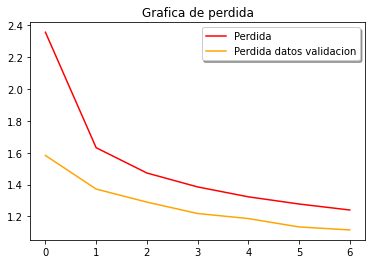

In [100]:
plt.title('Grafica de perdida')
plt.plot(H.history['loss'],color='r',label='Perdida')
plt.plot(H.history['val_loss'],color='orange',label='Perdida datos validacion')
plt.legend(loc='best', shadow=True)

In [101]:
score = modelo.evaluate(x_ts, y_ts)

3000/3000 [==============================] - 28s 9ms/step - loss: 1.1249 - top_k_categorical_accuracy: 0.9052


# Predicciones

Usando imagenes de fotografia

In [187]:
!wget 'https://raw.githubusercontent.com/mmonreal/Proyecto-Redes/master/fotos/cloud.jpg'
!wget 'https://raw.githubusercontent.com/mmonreal/Proyecto-Redes/master/fotos/cat.jpg'

--2020-06-11 06:08:34--  https://raw.githubusercontent.com/mmonreal/Proyecto-Redes/master/fotos/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132806 (130K) [image/jpeg]
Saving to: ‘cloud.jpg’

cloud.jpg           100%[===================>] 129.69K  --.-KB/s    in 0.02s   

2020-06-11 06:08:34 (5.20 MB/s) - ‘cloud.jpg’ saved [132806/132806]

--2020-06-11 06:08:35--  https://raw.githubusercontent.com/mmonreal/Proyecto-Redes/master/fotos/cat.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 230231 (225K) [image/jpeg]
Saving to: ‘

['calendar', 'stairs', 'dresser', 'line', 'bench']


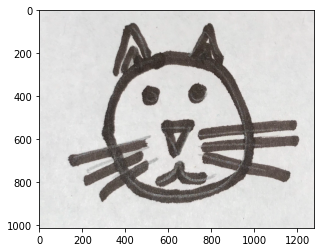

In [188]:
import cv2
import math

#Metodo que se le pasa la ruta de la imagen y la procesa
def reconocerImagen(nombre):
    imagenOriginal = cv2.imread(nombre)
    imagenProcesada = cv2.resize(cv2.imread(nombre),(28,28))
    datos_de_imagen = np.array([np.array(imagenProcesada)])
    datos = datos_de_imagen.reshape(-1,28,28,1).astype('float32')/255
    #Aqui es donde hacemos la prediccion
    pred = modelo.predict([datos])[0]
    plt.imshow(imagenOriginal)
    ind = (-pred).argsort()[:5]
    ll = [categoria[x] for x in ind]
    print(ll)

reconocerImagen('cat.jpg')

['calendar', 'diving_board', 'stairs', 'line', 'school_bus']


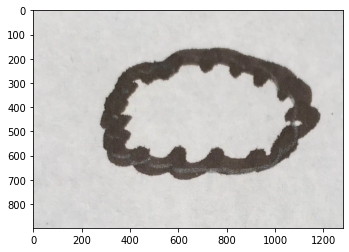

In [189]:
reconocerImagen('cloud.jpg')

Usando imagenes digitales

['smiley_face', 'face', 'moon', 'power_outlet', 'donut']


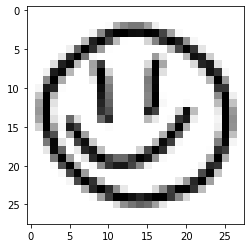

In [158]:
import matplotlib.pyplot as plt
from random import randint

#Hacemos las predicciones
numero = randint(0, len(x_ts))
imagen = x_ts[numero]
plt.imshow(imagen.squeeze(),cmap='binary') 
pred = modelo.predict(np.expand_dims(imagen, axis=0))[0]
indice = (-pred).argsort()[:5]
ll = [categoria[x] for x in indice]
print(ll)

# Guardamos el modelo junto con sus clases

In [0]:
with open('categorias.txt', 'w') as f:
    for i in categoria:
        f.write(i+"\n")

Instalamos tensorflow para poder convertir nuestro modelo en algo que pueda leer nuestro navegador

In [160]:
!pip install tensorflowjs 

     |████████████████████████████████| 61kB 2.7MB/s 
     |████████████████████████████████| 92kB 5.2MB/s 
     |████████████████████████████████| 144.4MB 83kB/s 
     |████████████████████████████████| 256kB 36.1MB/s 
     |████████████████████████████████| 921kB 34.6MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=73796e26cd29dd8c8579b4b3bbe3941b6267c8ebc99e2c5e3794095fd1816a49
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tensorflow-hub 0.8.0
    Uninstalling tensorflow-hub-0.8.0:
      Successfully uninstalled tensorflow-hub-0.8.0
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation:

In [0]:
modelo.save('mi_modelo.h5')

In [0]:
!mkdir modelo
!tensorflowjs_converter --input_format keras mi_modelo.h5 modelo/

In [0]:
!cp categorias.txt modelo/categorias.txt

In [171]:
!zip -r modelo.zip modelo

updating: modelo/ (stored 0%)
updating: modelo/model.json (deflated 82%)
updating: modelo/group1-shard1of1.bin (deflated 7%)
  adding: modelo/categorias.txt (deflated 42%)


In [0]:
from google.colab import files
files.download('modelo.zip')